In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hardware.csv to hardware (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['hardware.csv']))

In [ ]:
df2

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,binaryClass
0,adviser,125,256,6000,256,16,128,N
1,amdahl,29,8000,32000,32,8,32,N
2,amdahl,29,8000,32000,32,8,32,N
3,amdahl,29,8000,32000,32,8,32,N
4,amdahl,29,8000,16000,32,8,16,N
...,...,...,...,...,...,...,...,...
204,sperry,124,1000,8000,0,1,8,P
205,sperry,98,1000,8000,32,2,8,P
206,sratus,125,2000,8000,0,2,14,P
207,wang,480,512,8000,32,0,0,P


In [ ]:
#creating files

In [ ]:
sha=df2.shape

In [ ]:
df2.isnull().sum()

vendor         0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
binaryClass    0
dtype: int64

In [ ]:
df2.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000


In [ ]:
si=df2.groupby('binaryClass').size()

<Figure size 1080x720 with 0 Axes>

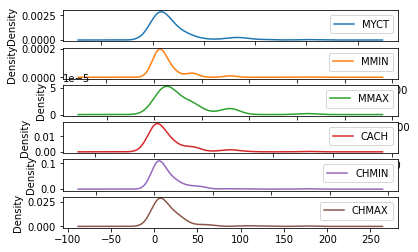

In [ ]:
plt.figure(figsize=(15,10))
data1=pd.DataFrame(df2[['vendor','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','binaryClass',]])
data1.plot(kind='density',subplots=True,sharex=False)
plt.show()

MYCT        AxesSubplot(0.125,0.125;0.110714x0.755)
MMIN     AxesSubplot(0.257857,0.125;0.110714x0.755)
MMAX     AxesSubplot(0.390714,0.125;0.110714x0.755)
CACH     AxesSubplot(0.523571,0.125;0.110714x0.755)
CHMIN    AxesSubplot(0.656429,0.125;0.110714x0.755)
CHMAX    AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

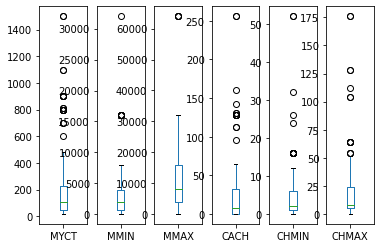

In [ ]:
#BOX PLOTTING: SHOWS THE MEAN VALUE AND OUTLIERS OUTSIDE THE BOX
data1.plot(kind='box',subplots=True,sharex=False,sharey=False)

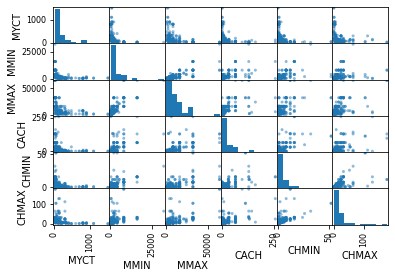

In [ ]:
pd.plotting.scatter_matrix(data1)
plt.show()

In [ ]:
#data taking
data=pd.read_csv('hardware.csv')
print(data.head())
y=data['binaryClass'].values
print(y)
x=data.drop(['binaryClass'],axis=1).values
y=np.where(y=='stable',1,-1)
print(y)

    vendor  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX binaryClass
0  adviser   125   256   6000   256     16    128           N
1   amdahl    29  8000  32000    32      8     32           N
2   amdahl    29  8000  32000    32      8     32           N
3   amdahl    29  8000  32000    32      8     32           N
4   amdahl    29  8000  16000    32      8     16           N
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'P' 'P' 'P' 'N' 'P' 'P' 'P' 'P'
 'P' 'N' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'N' 'N' 'P' 'P' 'N' 'N'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'N' 'N' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'N' 'P'
 'N' 'N' 'P' 'P' 'N' 'N' 'N' 'N' 'N' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'N' 'N' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'N' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'N' 'N' 'N' 'N' 'P' 'N' 'N' 'N' 'N' 'N'

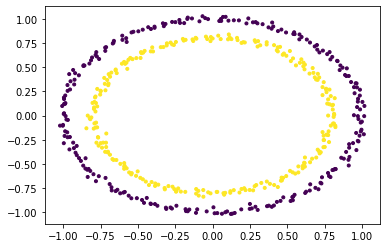

In [ ]:
# importing models of non linear svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# generating data
X, Y = make_circles(n_samples = 500, noise = 0.02)

# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()


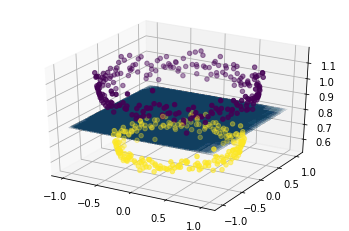

In [ ]:
#importing models of linear kernal
# create support vector classifier using a linear kernel
from sklearn import svm

svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)
w = svc.coef_
b = svc.intercept_

# plotting the separating hyperplane
x1 = X[:, 0].reshape((-1, 1))
x2 = X[:, 1].reshape((-1, 1))
x1, x2 = np.meshgrid(x1, x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]

fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
plt.show()


Confusion matrix, without normalization
[[13  0  0]
 [ 0 13  3]
 [ 0  0  9]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     0.8125 0.1875]
 [0.     0.     1.    ]]


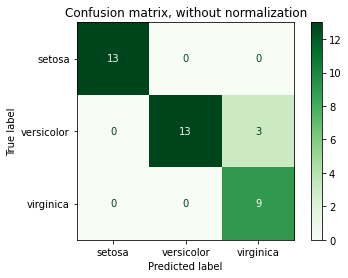

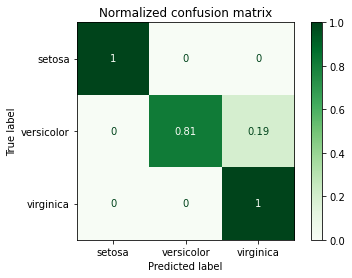

In [ ]:
#confusion matrix for SVM
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.02).fit(X_train, y_train)

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#importing models of neural network
import numpy as np

# array of any amount of numbers. n = m
X = np.array([[1, 2, 3],
			[3, 4, 1],
			[2, 5, 3]])
				
# multiplication
y = np.array([[.5, .3, .2]])

# transpose of y
y = y.T

# sigma value
sigm = 2

# find the delta
delt = np.random.random((3, 3)) - 1

for j in range(100):
	# find confusion matrix 1. 100 layers.
	m1 = (y - (1/(1 + np.exp(-(np.dot((1/(1 + np.exp(
				-(np.dot(X, sigm))))), delt))))))*((1/(
					1 + np.exp(-(np.dot((1/(1 + np.exp(
				-(np.dot(X, sigm))))), delt)))))*(1-(1/(
					1 + np.exp(-(np.dot((1/(1 + np.exp(
				-(np.dot(X, sigm))))), delt)))))))
					
	# find confusion matrix 2
	m2 = m1.dot(delt.T) * ((1/(1 + np.exp(-(np.dot(X, sigm)))))
					* (1-(1/(1 + np.exp(-(np.dot(X, sigm)))))))
	# find delta
	delt = delt + (1/(1 + np.exp(-(np.dot(X, sigm))))).T.dot(m1)
	
	# find sigma
	sigm = sigm + (X.T.dot(m2))
	
# print output from the matrix
print(1/(1 + np.exp(-(np.dot(X, sigm)))))


[[0.99999329 0.99999375 0.99999385]
 [0.99999988 0.99999989 0.99999989]
 [1.         1.         1.        ]]


In [ ]:
# Importing the dataset.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

# Creating independent and dependent variables.
X, y = mnist['data'], mnist['target']

# Splitting the data into training set and test set.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

"""
The training set is already shuffled for us, which is good as this guarantees that all
cross-validation folds will be similar.
"""

# Training a binary classifier.
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

"""
Building a dumb classifier that just classifies every single image in the “not-5” class.
"""

from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
	def fit(self, X, y=None):
		pass
	def predict(self, X):
		return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([1., 1., 1.])

In [ ]:
#prediction 
# Importing the dependancies 
from sklearn import metrics
# Predicted values
y_pred = ["a", "b", "c", "a", "b"]
# Actual values
y_act = ["a", "b", "c", "c", "a"]
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_act, y_pred, labels=["a", "b", "c"]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, y_pred, labels=["a", 
"b","c"]))

[[1 1 0]
 [0 1 0]
 [1 0 1]]
              precision    recall  f1-score   support

           a       0.50      0.50      0.50         2
           b       0.50      1.00      0.67         1
           c       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.67      0.67      0.61         5
weighted avg       0.70      0.60      0.60         5

